 ###  Лабораторная работа №5.
###  Численное решение системы линейных уравнений, численное интегрирование.

### Вычисление интеграла с помощью рекурентной формулы Буля.

$B(N)=\frac{16S(N)-T(N-1)}{15}$,$N$=1,2,...Для  $2^N$ подинтервалов области $[\alpha;\beta]$.Где $S(N)$-последовательность формул Симпсона, а $T(N)$-последовательность формул трапеций.

Формулы площади трапеции:

$T(0)=\frac{h(f(\alpha)+f(\beta))}{2}$, где $h=\beta-\alpha$

$T(N)=\frac{T(N-1)}{2}+h\sum_{k=1}^M f(x_{2k-1})$, $N=1,2....$, где $h=\frac{\beta-\alpha}{2^N}$*

*Точки $x_k= \alpha +kh $ делят отрезок $[\alpha;\beta]$ на $2^n=2M$ частей*


### Решение системы линейных уравнений методом Гаусса-Зейделя.
Решаем систему линейных уравнений вида $Ax=F$.
$H_k$=$(D+L)^{-1}$.
$T_k$=$-(D+L)^{-1}$$R$, где $L$-нижняя треугольная матрица с нулевыми диагональными элементами,$D$-диагональная матрица,$R$-верхняя треугольная матрица с нулевыми диагональными элементами.  

$x ^ {(k+1)}$=$T_k$*$x^k$+$H_k$ * $b$.

Важным обстоятельством данного метода является то, что для вычисления каждой координаты очередного вектора $x ^ {(k+1)}$ используется(уже вычисленные) все предыдущие его координаты.

Реутов А. 431.

In [13]:
import numpy as np
import math
T=np.zeros(25)
s=np.zeros(25)
b=np.zeros(7)
e=0.001;
def f(x,i):    
 return ((math.sin(x+5))/(1+i+i*(x**2)))

def r(N,i):    
  h=5/(2**N)
  M=(2**(N-1));q=0;
  for k in range(1,M+1):
   x1=((2*k)-1)*h
   q+=f(x1,i)   
  return(q*h)         

def B(i):    #Интегрирование по рекур. формуле Буля.
  t0=(5/2)*(f(0,i)+f(5,i))
  T[0]=t0
  T[1]=T[0]/2+r(1,i)
  T[2]=T[1]/2+r(2,i)
  s[1]=(4*T[1]-T[0])/3
  b[1]=(16*s[1]-T[0])/15 
  b[2]=(16*s[2]-T[1])/15
  x=b[1];y=b[2];j=3;
  while (math.fabs((x-y)/x))>e:
    T[j]=(T[j-1]/2 +r(j,i))
    s[j]=(4*T[j]-T[j-1])/3
    b[j]=(16*s[j]-T[j-1])/15 
    x=b[j-1]
    y=b[j]
    N=j
    j=j+1
  return b[N]
print(B(2))

-0.0913704672522


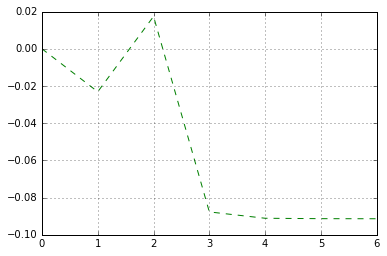

In [2]:
% matplotlib inline              
import matplotlib.pyplot as plt      #Зависимость значения интеграла от номера итерации.
import numpy as np
plt.plot(b,'g--') 
plt.grid(True)
plt.show()

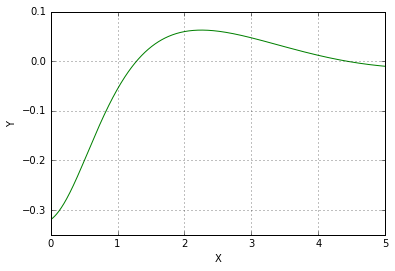

In [3]:
import matplotlib.pyplot as plt    #график подынтегральной функции.
F=[];x=[];i=2;F1=[];F2=[];
x2=[];x21=[];x22=[];
for x1 in range(0,500):  
 x=x1/100; x2.append(x)
 F.append(f(x,i))

for x11 in range(0,50):  
 x=x11/10; x21.append(x)
 F1.append(f(x,i))

for x12 in range(0,5000):  
 x=x12/1000; x22.append(x)
 F2.append(f(x,i))    

plt.xlabel("X")
plt.ylabel("Y")
plt.plot(x2,F,'g')
plt.grid(True)
plt.show()



In [4]:
import numpy as np  #Вычисление интеграла с помощью встроенной функции.
print(np.trapz(F,x2))
print(np.trapz(F1,x21))
print(np.trapz(F2,x22))

-0.0912838894925
-0.090512253675
-0.0913747947622


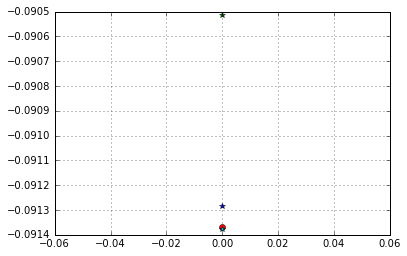

In [7]:
import matplotlib.pyplot as plt      #Сравнение различных методов вычисления интегралов. 
import numpy as np 
plt.plot(B(2),'ro') 

plt.plot(np.trapz(F,x2),'b*')
plt.plot(np.trapz(F1,x21),'g*')
plt.plot(np.trapz(F2,x22),'c*')

plt.grid(True)
plt.show()


In [14]:
import numpy as np     #Заполнение матрицы.
import math
n=10000
y=np.zeros((n,n))
x=np.zeros(n)
f1=np.zeros(n)
y[0][0]=1;x[0]=10;y[n-1][n-1]=1;x[n-1]=1;f1[0]=1;f1[n-1]=1;
for i in range(1,n-1):          
 y[i][i-1]=1 
 y[i][i]=(10+(math.cos(i))/i)
 f1[i]=(math.cos(i)/i)+10
 y[i][i+1]=1
 x[i]=-10+B(i)
x[n-1]=1; y[n-1][n-1]=1
np.set_printoptions(precision=4,suppress=True,linewidth=250)
#print(y)
np.set_printoptions(precision=4,suppress=True,linewidth=1)
#print(x)
#print(f1) 

In [18]:
import numpy as np               #Начальное приближение решения системы уравнений.
from numpy import linalg as la    
from time import time
import math
n=10000; x1=np.ones(n)*1; x1[0]=10;x1[n-1]=1

def gz(e):                       #Решение СЛУ методом Гаусса-Зейделя.
 click=time()
 q=1;N1=0;Q=np.zeros(5);Q[0]=la.norm(x1);z=[];
 while q>e:
  j=0;
  N1=N1+1;
  g=la.norm(x1);
  for j in range(1,n-1):
   x1[j]=(1/y[j][j])*(x[j]-x1[j-1]-x1[j+1])
  q1=la.norm(x1);Q[N1]=q1;
  q=math.fabs((q1-g)/g)
  clack=time()
 #return(x1,N1,q,Q)  #Всё
 return(x1)         #Решения 
 #return(Q)         #Норма
 #return(clack-click)
#print(gz(0.001))   

In [10]:
import numpy as np          #Решение СЛУ встроенной функцией.
from time import time
from numpy import linalg as la
click=time()
z=la.solve(y,x)
clack=time()
print(z)
print("time=",clack-click)

[  10.
  -1.8359
  -0.7536
 ...,
  -0.8146
  -1.0185
   1.    ]
time= 77.89654111862183


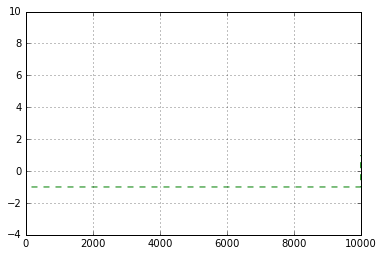

In [19]:
import matplotlib.pyplot as plt      #График решений СЛУ.
import numpy as np 
plt.plot(gz(0.001),'g--') 
plt.grid(True)
plt.show()

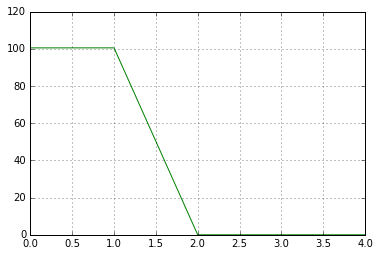

In [16]:

import matplotlib.pyplot as plt      #График зависимости нормы решения от номера итерации.
import numpy as np 
plt.plot(gz(0.001),'g-') 
plt.grid(True)
plt.show()

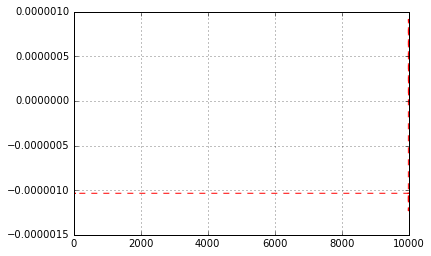

In [22]:
import matplotlib.pyplot as plt      #Сравнение решений СЛУ, полученных разными методами.
import numpy as np 
from numpy import linalg as la
#plt.plot(gz(0.001),'g-') 
plt.plot(la.solve(y,x)-gz(0.001),'r--')
plt.grid(True)
plt.show()